In [ ]:
import nltk
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

In [ ]:
f = open('x_train.txt','r', encoding="utf8")
x_train_lines = f.readlines()
f = open('y_train.txt','r', encoding="utf8")
y_train_lines = f.readlines()
f = open('x_val.txt','r', encoding="utf8")
x_val_lines = f.readlines()
f = open('y_val.txt','r', encoding="utf8")
y_val_lines = f.readlines()

Load train text and do Vader&TextBlob

In [ ]:
x_train = []
x_pred_vader = []
x_pred_text_blob = []
for line in x_train_lines:
    x_train.append(line)
    x_pred_vader.append(sid.polarity_scores(line)['compound'])
    tb = TextBlob(line)
    x_pred_text_blob.append(tb.sentiment.polarity)

Load labels for training

In [ ]:
y_train = []
for line in y_train_lines:
    y_train.append(int(line))

# threshold => 0... 0.425 .. 0.005

In [ ]:
for j in range(0,430,5):
    temp = []
    k = j/1000
    for i in x_pred_vader:
        if i >= k and  i <= k:
            temp.append(0)
        if i > k:
            temp.append(1)
        if i < k:
            temp.append(-1)
    globals()[f"vader_pred_{j}"] = temp.copy()
    temp = []
    for i in x_pred_text_blob:
        if i >= k and  i <= k:
            temp.append(0)
        if i > k:
            temp.append(1)
        if i < k:
            temp.append(-1)
    globals()[f"text_blob_pred_{j}"] = temp.copy()

In [ ]:
max_vader_score = 0
max_vader_i = -1
max_text_blob_score = 0
max_text_blob_i = -1
for i in range(0,430,5):
    score_vader = accuracy_score(y_train, globals()[f"vader_pred_{i}"])
    score_text_blob = accuracy_score(y_train, globals()[f"text_blob_pred_{i}"])
    if max_vader_score < score_vader:
        max_vader_score = score_vader
        max_vader_i = i
    if max_text_blob_score < score_text_blob:
        max_text_blob_score = score_text_blob
        max_text_blob_i = i
print('***VADER*** \n Best accuracy for is: ' + str(max_vader_score) + '%\n For ROC: ' + str(max_vader_i/1000))
print('***TEXT_BLOB*** \n Best accuracy for is: ' + str(max_text_blob_score) + '%\n For ROC: ' + str(max_text_blob_i/1000))

***VADER*** 
 Best accuracy for is: 0.4084615384615385%
 For ROC: 0.0
***TEXT_BLOB*** 
 Best accuracy for is: 0.4065384615384615%
 For ROC: 0.0


In [ ]:
vader_pred =  globals()[f"vader_pred_{max_vader_i}"]
text_blob_pred = globals()[f"text_blob_pred_{max_text_blob_i}"]

# Report train Vader

              precision    recall  f1-score   support

          -1       0.35      0.45      0.39       771
           0       0.37      0.27      0.32       761
           1       0.49      0.48      0.48      1068

    accuracy                           0.41      2600
   macro avg       0.40      0.40      0.40      2600
weighted avg       0.41      0.41      0.41      2600

[[344 158 269]
 [285 208 268]
 [365 193 510]]


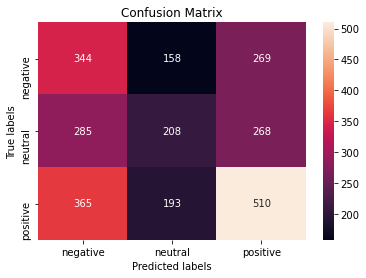

In [ ]:
classification_reportSVM = classification_report(y_train, vader_pred)
print(classification_reportSVM)
confusion_matrixSVM = confusion_matrix(y_train, vader_pred)
print(confusion_matrixSVM)

ax = plt.subplot()
sns.heatmap(confusion_matrixSVM, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['negative', 'neutral', 'positive']); ax.yaxis.set_ticklabels(['negative', 'neutral', 'positive']);

# Report train TextBlob

              precision    recall  f1-score   support

          -1       0.34      0.28      0.31       771
           0       0.35      0.34      0.34       761
           1       0.48      0.54      0.51      1068

    accuracy                           0.41      2600
   macro avg       0.39      0.39      0.39      2600
weighted avg       0.40      0.41      0.40      2600

[[217 223 331]
 [199 260 302]
 [224 264 580]]


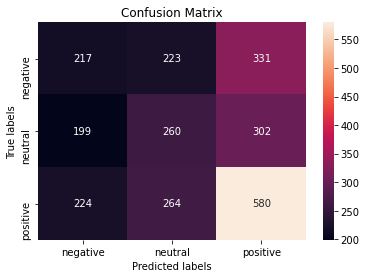

In [ ]:
classification_reportSVM = classification_report(y_train, text_blob_pred)
print(classification_reportSVM)
confusion_matrixSVM = confusion_matrix(y_train, text_blob_pred)
print(confusion_matrixSVM)

ax = plt.subplot()
sns.heatmap(confusion_matrixSVM, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['negative', 'neutral', 'positive']); ax.yaxis.set_ticklabels(['negative', 'neutral', 'positive']);

# Validation data

Load validation data

In [ ]:
x_val = []
x_val_vader = []
x_val_text_blob = []
for line in x_val_lines:
    x_val.append(line)
    x_val_vader.append(sid.polarity_scores(line)['compound'])
    tb = TextBlob(line)
    x_val_text_blob.append(tb.sentiment.polarity)
y_val = []
for line in y_val_lines:
    y_val.append(int(line))

In [ ]:
vader_val = []
k = max_vader_i

for i in x_val_vader:
    if i >= k and  i <= k:
        vader_val.append(0)
    if i > k:
        vader_val.append(1)
    if i < k:
        vader_val.append(-1)

text_blob_val = []
k = max_text_blob_i
for i in x_val_text_blob:
    if i >= k and  i <= k:
        text_blob_val.append(0)
    if i > k:
        text_blob_val.append(1)
    if i < k:
        text_blob_val.append(-1)

In [ ]:
def plot_multiclass_roc(y_test, y_score, n_classes, figsize=(17, 6)):
    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    y_score_dummies = pd.get_dummies(y_score, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score_dummies[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

# Report val Vader

              precision    recall  f1-score   support

          -1       0.33      0.43      0.38        21
           0       0.30      0.40      0.34        30
           1       0.56      0.38      0.45        48

    accuracy                           0.39        99
   macro avg       0.40      0.40      0.39        99
weighted avg       0.43      0.39      0.40        99

[[ 9  8  4]
 [ 8 12 10]
 [10 20 18]]


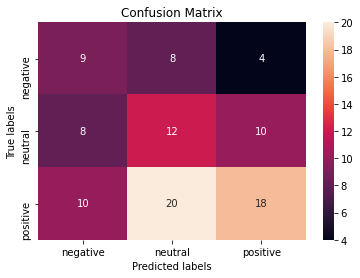

In [ ]:
classification_reportSVM = classification_report(y_val, vader_val)
print(classification_reportSVM)
confusion_matrixSVM = confusion_matrix(y_val, vader_val)
print(confusion_matrixSVM)

ax = plt.subplot()
sns.heatmap(confusion_matrixSVM, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['negative', 'neutral', 'positive']); ax.yaxis.set_ticklabels(['negative', 'neutral', 'positive']);

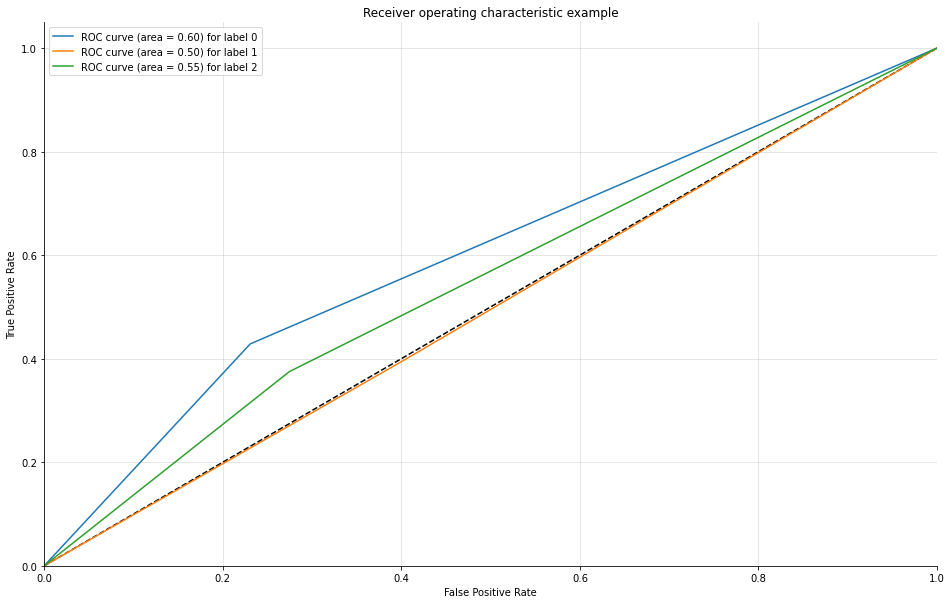

In [ ]:
plot_multiclass_roc(y_val,vader_val , n_classes=3, figsize=(16, 10))

# Report val TextBlob

              precision    recall  f1-score   support

          -1       0.21      0.19      0.20        21
           0       0.25      0.37      0.30        30
           1       0.44      0.33      0.38        48

    accuracy                           0.31        99
   macro avg       0.30      0.30      0.29        99
weighted avg       0.34      0.31      0.32        99

[[ 4 12  5]
 [ 4 11 15]
 [11 21 16]]


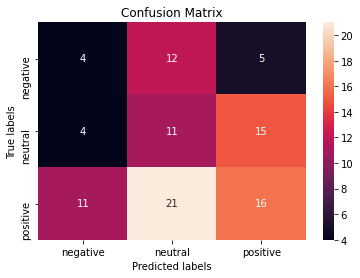

In [ ]:
classification_reportSVM = classification_report(y_val, text_blob_val)
print(classification_reportSVM)
confusion_matrixSVM = confusion_matrix(y_val, text_blob_val)
print(confusion_matrixSVM)

ax = plt.subplot()
sns.heatmap(confusion_matrixSVM, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['negative', 'neutral', 'positive']); ax.yaxis.set_ticklabels(['negative', 'neutral', 'positive']);

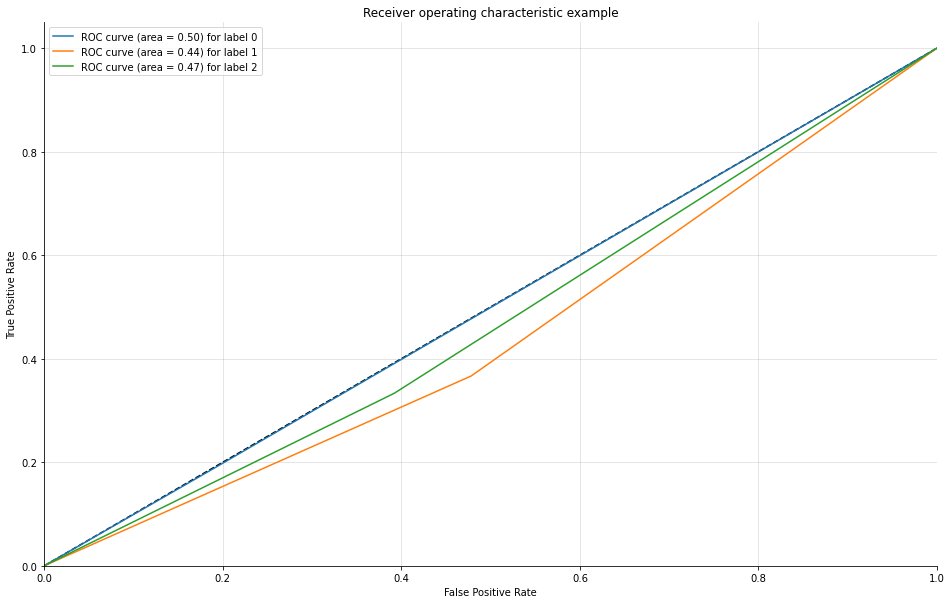

In [ ]:
plot_multiclass_roc(y_val,text_blob_val , n_classes=3, figsize=(16, 10))